In [1]:
import cptac
import numpy as np
import pandas as pd
from gprofiler import GProfiler
import seaborn as sns
import matplotlib.pyplot as plt

cptac warning: Your version of cptac (0.8.8) is out-of-date. Latest is 0.9.0. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-1cd1c7874502>, line 1)


In [2]:
permutation_df = pd.read_csv('data/full_10k_permutation_corrected.csv')
correlation_df = pd.read_csv('data/corr_diff.csv')
regression_df = pd.read_csv('data/regressions_data.csv')

In [3]:
permutation_df = pd.melt(permutation_df, id_vars='Cancer', var_name = 'Gene', value_name = 'perm_pval')

In [4]:
correlation_df = correlation_df.melt(id_vars='Cancer', var_name='Gene', value_name='delta_corr') 

In [5]:
regression_df = regression_df.rename(columns={'gene': 'Gene', 'cancer': 'Cancer'})
regression_df = regression_df[['Cancer', 'Gene', 'interaction_coeff', 'interaction_pval']]

In [6]:
df = pd.merge(permutation_df, correlation_df, how = 'outer')
df = pd.merge(df, regression_df, how = 'outer')

In [7]:
background_genes = list(pd.unique(df.Gene))
len(background_genes)

13669

In [8]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.perm_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_perm_df = pd.DataFrame(rows)
sig_perm_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAAS,0.029511,0.383641,0.478558,0.310070,0.478558
1,AAGAB,0.000010,0.513239,0.744205,0.099849,0.744205
2,AAK1,0.000017,0.539893,0.468512,0.058654,0.468512
3,AAMP,0.007805,0.422332,0.834418,0.051275,0.834418
4,AARS,0.007671,0.443220,0.588859,0.273249,0.588859
...,...,...,...,...,...,...
3803,ZSCAN18,0.009996,0.461501,0.204678,0.498252,0.204678
3804,ZW10,0.001301,0.481355,0.596254,0.095312,0.596254
3805,ZWILCH,0.000030,0.775549,1.843545,0.101584,1.843545
3806,ZWINT,0.001874,0.854401,0.988399,0.001941,0.988399


In [9]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.interaction_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_regression_df = pd.DataFrame(rows)
sig_regression_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAK1,2.187208e-09,0.539893,0.453549,0.005085,0.453549
1,AARS2,1.575518e-01,0.399337,0.719068,0.015352,0.719068
2,AASDHPPT,4.554894e-09,0.569367,0.850032,0.001351,0.850032
3,AASS,9.059842e-08,0.516246,1.079797,0.015262,1.079797
4,ABCB10,2.677682e-02,0.345190,1.149501,0.013915,1.149501
...,...,...,...,...,...,...
1364,ZNF638,2.620840e-04,0.647382,1.012607,0.002426,1.012607
1365,ZNF687,5.961230e-04,0.622238,0.797145,0.014088,0.797145
1366,ZNFX1,6.527134e-02,0.420009,0.388419,0.005495,0.388419
1367,ZNHIT2,5.211000e-05,0.664401,0.756881,0.000306,0.756881


In [10]:
gp = GProfiler(return_dataframe=True)

In [11]:
sig_perm_unranked = pd.unique(sig_perm_df.Gene)
sig_perm_df = sig_perm_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_perm_slope = pd.unique(sig_perm_df.Gene)
sig_perm_upregulated = sig_perm_df[sig_perm_df.interaction_coeff >= 0]
sig_perm_upregulated_unranked = pd.unique(sig_perm_upregulated.Gene)
sig_perm_upregulated = sig_perm_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_perm_upregulated = pd.unique(sig_perm_upregulated.Gene)
sig_perm_downregulated = sig_perm_df[sig_perm_df.interaction_coeff <= 0]
sig_perm_downregulated_unranked = pd.unique(sig_perm_downregulated.Gene)
sig_perm_downregulated = sig_perm_downregulated.sort_values(by = 'interaction_coeff')
sig_perm_downregulated = pd.unique(sig_perm_downregulated.Gene)

In [12]:
sig_perm_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:CC'])

In [13]:
sig_perm_slope = gp.profile(organism='hsapiens', query = list(sig_perm_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:CC'])

In [14]:
sig_perm_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:CC'])

In [15]:
sig_perm_upregulated = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:CC'])

In [16]:
sig_perm_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:CC'])

In [17]:
sig_perm_downregulated = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:CC'])

In [18]:
sig_regression_unranked = pd.unique(sig_regression_df.Gene)
sig_regression_df = sig_regression_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_regression_slope = pd.unique(sig_regression_df.Gene)
sig_regression_upregulated = sig_regression_df[sig_regression_df.interaction_coeff >= 0]
sig_regression_upregulated_unranked = pd.unique(sig_regression_upregulated.Gene)
sig_regression_upregulated = sig_regression_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_regression_upregulated = pd.unique(sig_regression_upregulated.Gene)
sig_regression_downregulated = sig_regression_df[sig_regression_df.interaction_coeff <= 0]
sig_regression_downregulated_unranked = pd.unique(sig_regression_downregulated.Gene)
sig_regression_downregulated = sig_regression_downregulated.sort_values(by = 'interaction_coeff')
sig_regression_downregulated = pd.unique(sig_regression_downregulated.Gene)

In [19]:
sig_regression_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:CC'])

In [20]:
sig_regression_slope = gp.profile(organism='hsapiens', query = list(sig_regression_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:CC'])

In [21]:
sig_regression_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:CC'])

In [22]:
sig_regression_upregulated = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:CC'])

In [23]:
sig_regression_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO:CC'])

In [24]:
sig_regression_downregulated = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO:CC'])

In [25]:
sig_perm_unranked['Analysis'] = ['perm_unranked'] * len(sig_perm_unranked)
sig_perm_slope['Analysis'] = ['perm_slope'] * len(sig_perm_slope)
sig_perm_upregulated_unranked['Analysis'] = ['perm_upregulated_unranked'] * len(sig_perm_upregulated_unranked)
sig_perm_upregulated['Analysis'] = ['perm_upregulated'] * len(sig_perm_upregulated)
sig_perm_downregulated_unranked['Analysis'] = ['perm_downregulated_unranked'] * len(sig_perm_downregulated_unranked)
sig_perm_downregulated['Analysis'] = ['perm_downregulated'] * len(sig_perm_downregulated)

In [26]:
sig_regression_unranked['Analysis'] = ['regression_unranked'] * len(sig_regression_unranked)
sig_regression_slope['Analysis'] = ['regression_slope'] * len(sig_regression_slope)
sig_regression_upregulated_unranked['Analysis'] = ['regression_upregulated_unranked'] * len(sig_regression_upregulated_unranked)
sig_regression_upregulated['Analysis'] = ['regression_upregulated'] * len(sig_regression_upregulated)
sig_regression_downregulated_unranked['Analysis'] = ['regression_downregulated_unranked'] * len(sig_regression_downregulated_unranked)
sig_regression_downregulated['Analysis'] = ['regression_downregulated'] * len(sig_regression_downregulated)

In [27]:
upregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_upregulated_unranked,sig_perm_upregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_upregulated_unranked,sig_regression_upregulated]

In [28]:
upregulated_pathways_df = pd.concat(upregulated_pathways)
upregulated_pathways_df = upregulated_pathways_df[upregulated_pathways_df.term_size < 500]
upregulated_pathways_df = upregulated_pathways_df[upregulated_pathways_df.term_size > 15]
upregulated_pathways_df

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences,Analysis
9,GO:CC,GO:0005759,mitochondrial matrix,1.313513e-13,True,"""The gel-like material, with considerable fine...",400,3746,191,13575,0.050988,0.477500,query_1,"[GO:0005739, GO:0043233, GO:0070013]","[AASS, ABAT, ABCE1, ACAA2, ACAD10, ACAD8, ACAD...","[[TAS], [TAS], [TAS], [TAS], [TAS], [TAS], [TA...",perm_unranked
22,GO:CC,GO:0031252,cell leading edge,1.420159e-02,True,"""The area of a motile cell closest to the dire...",256,3746,108,13575,0.028831,0.421875,query_1,[GO:0110165],"[AAK1, ABLIM1, ACAP2, ACTN1, ADGRE2, AIF1L, AK...","[[ISS], [IDA], [IDA], [IDA], [IDA], [IBA], [IS...",perm_unranked
0,GO:CC,GO:0005759,mitochondrial matrix,1.783081e-11,True,"""The gel-like material, with considerable fine...",400,3679,191,13575,0.051916,0.477500,query_1,"[GO:0005739, GO:0043233, GO:0070013]","[TFB2M, PYCR2, HARS2, ACAD10, TFB1M, LRPPRC, T...","[[IDA, IBA, TAS], [TAS], [TAS], [TAS], [IDA, I...",perm_slope
6,GO:CC,GO:0009295,nucleoid,8.753018e-04,True,"""The region of a virus, bacterial cell, mitoch...",40,56,6,13575,0.107143,0.150000,query_1,[GO:0110165],"[TFB2M, TFB1M, LRPPRC, TEFM, DNAJA3, SSBP1]","[[IDA], [IDA], [IDA], [IDA], [IDA], [IDA, IBA]]",perm_slope
7,GO:CC,GO:0042645,mitochondrial nucleoid,8.753018e-04,True,"""The region of a mitochondrion to which the DN...",40,56,6,13575,0.107143,0.150000,query_1,"[GO:0005759, GO:0009295, GO:0043232]","[TFB2M, TFB1M, LRPPRC, TEFM, DNAJA3, SSBP1]","[[IDA], [IDA], [IDA], [IDA], [IDA], [IDA, IBA]]",perm_slope
11,GO:CC,GO:0098687,chromosomal region,1.113894e-02,True,"""Any subdivision of a chromosome along its len...",239,2161,78,13575,0.036094,0.326360,query_1,"[GO:0005694, GO:0110165]","[INCENP, NCAPD3, ZWILCH, MCM7, MCM3, MCM5, SPA...","[[IDA, IBA], [IDA, IBA], [IDA], [HDA], [HDA], ...",perm_slope
8,GO:CC,GO:0005759,mitochondrial matrix,1.011692e-13,True,"""The gel-like material, with considerable fine...",400,3534,184,13575,0.052066,0.460000,query_1,"[GO:0005739, GO:0043233, GO:0070013]","[TFB2M, PYCR2, HARS2, ACAD10, TFB1M, LRPPRC, T...","[[IDA, IBA, TAS], [TAS], [TAS], [TAS], [IDA, I...",perm_upregulated_unranked
20,GO:CC,GO:0098687,chromosomal region,2.648941e-02,True,"""Any subdivision of a chromosome along its len...",239,3534,97,13575,0.027448,0.405858,query_1,"[GO:0005694, GO:0110165]","[INCENP, NCAPD3, ZWILCH, MCM7, MCM3, MCM5, SPA...","[[IDA, IBA], [IDA, IBA], [IDA], [HDA], [HDA], ...",perm_upregulated_unranked
21,GO:CC,GO:0030496,midbody,3.326005e-02,True,"""A thin cytoplasmic bridge formed between daug...",142,3534,64,13575,0.018110,0.450704,query_1,[GO:0110165],"[INCENP, CHMP1B, RACGAP1, LYRM1, ANLN, ECT2, P...","[[IDA, IBA], [IDA], [IDA], [IDA], [IDA], [IDA]...",perm_upregulated_unranked
0,GO:CC,GO:0005759,mitochondrial matrix,2.821826e-11,True,"""The gel-like material, with considerable fine...",400,3500,184,13575,0.052571,0.460000,query_1,"[GO:0005739, GO:0043233, GO:0070013]","[TFB2M, PYCR2, HARS2, ACAD10, TFB1M, LRPPRC, T...","[[IDA, IBA, TAS], [TAS], [TAS], [TAS], [IDA, I...",perm_upregulated


In [29]:
upregulated_pathways_df['p_value'] = -np.log10(upregulated_pathways_df['p_value'])

Text(0.5, 0, '-log10 p-value')

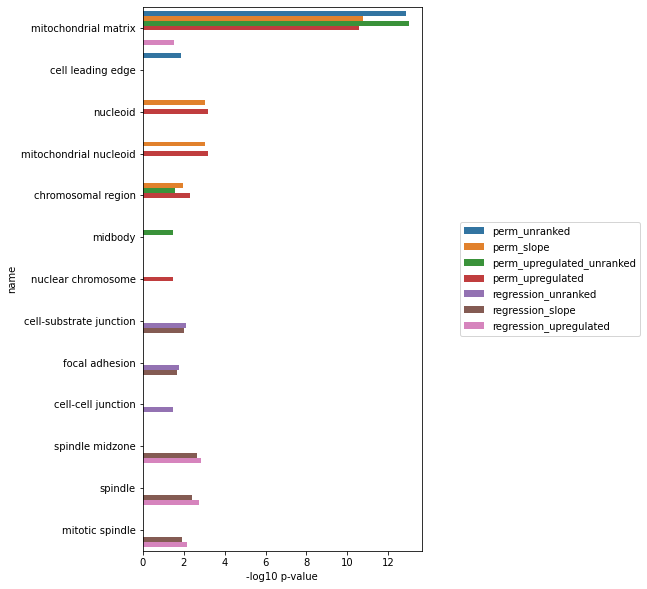

In [30]:
plt.figure(figsize=(5,10))
g = sns.barplot(data = upregulated_pathways_df,
               x = 'p_value', y = 'name', hue = 'Analysis')
g.legend(loc='center right', bbox_to_anchor=(1.8, .5))
plt.xlabel('-log10 p-value')

In [31]:
num_upregulated_analyses = len(pd.unique(upregulated_pathways_df.Analysis))

In [32]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-32-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [33]:
upregulated_pathways = []
upregulated_analyses = []
for pathway in pd.unique(upregulated_pathways_df.name):
    pathway_df = upregulated_pathways_df[upregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in upregulated_analyses:
        upregulated_analyses.append(analyses)
        upregulated_pathways.append({pathway})
    else:
        i = upregulated_analyses.index(analyses)
        upregulated_pathways[i].add(pathway)
upregulated_pathways_df = pd.DataFrame({'Analyses':upregulated_analyses, 'Pathways': upregulated_pathways})
upregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_upregulated_analyses for a in upregulated_pathways_df.Analyses]
upregulated_pathways_df = upregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
upregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
0,"{perm_upregulated, perm_unranked, regression_upregulated, perm_slope, perm_upregulated_unranked}",{mitochondrial matrix},0.714286
3,"{perm_slope, perm_upregulated, perm_upregulated_unranked}",{chromosomal region},0.428571
2,"{perm_slope, perm_upregulated}","{nucleoid, mitochondrial nucleoid}",0.285714
6,"{regression_slope, regression_unranked}","{focal adhesion, cell-substrate junction}",0.285714
8,"{regression_slope, regression_upregulated}","{spindle midzone, mitotic spindle, spindle}",0.285714
1,{perm_unranked},{cell leading edge},0.142857
4,{perm_upregulated_unranked},{midbody},0.142857
5,{perm_upregulated},{nuclear chromosome},0.142857
7,{regression_unranked},{cell-cell junction},0.142857


In [34]:
rows = []
for index, row in upregulated_pathways_df.iterrows():
    pathways = row.Pathways
    for pathway in pathways:
        new_row = dict()
        new_row['Pathway'] = pathway
        new_row['Frequency'] = row.Pathway_Frequency
        rows.append(new_row)
upregulated_pathways_df = pd.DataFrame(rows)
upregulated_pathways_df

,Pathway,Frequency
0,mitochondrial matrix,0.714286
1,chromosomal region,0.428571
2,nucleoid,0.285714
3,mitochondrial nucleoid,0.285714
4,focal adhesion,0.285714
5,cell-substrate junction,0.285714
6,spindle midzone,0.285714
7,mitotic spindle,0.285714
8,spindle,0.285714
9,cell leading edge,0.142857


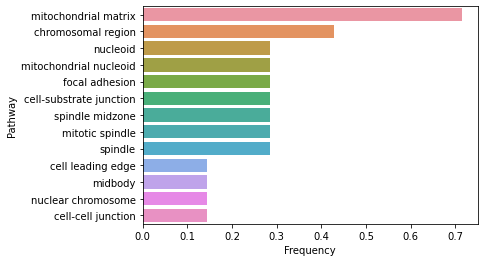

In [35]:
axes = sns.barplot(data = upregulated_pathways_df, y = 'Pathway', x = 'Frequency')


In [36]:
downregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_downregulated_unranked,sig_perm_downregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_downregulated_unranked,sig_regression_downregulated]
downregulated_pathways_df = pd.concat(downregulated_pathways)
num_downregulated_analyses = len(pd.unique(downregulated_pathways_df.Analysis))

In [37]:
downregulated_pathways = []
downregulated_analyses = []
for pathway in pd.unique(downregulated_pathways_df.name):
    pathway_df = downregulated_pathways_df[downregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in downregulated_analyses:
        downregulated_analyses.append(analyses)
        downregulated_pathways.append({pathway})
    else:
        i = downregulated_analyses.index(analyses)
        downregulated_pathways[i].add(pathway)
downregulated_pathways_df = pd.DataFrame({'Analyses':downregulated_analyses, 'Pathways': downregulated_pathways})
downregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_downregulated_analyses for a in downregulated_pathways_df.Analyses]
downregulated_pathways_df = downregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
downregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
4,"{perm_downregulated_unranked, perm_unranked, perm_downregulated, regression_downregulated, regression_unranked, regression_downregulated_unranked, regression_slope}",{extracellular exosome},0.875
5,"{perm_downregulated_unranked, perm_unranked, perm_downregulated, regression_downregulated, regression_unranked, regression_downregulated_unranked}","{extracellular organelle, extracellular vesicle}",0.750
6,"{perm_downregulated_unranked, perm_unranked, regression_downregulated, regression_unranked, regression_downregulated_unranked}",{vesicle},0.625
1,"{regression_slope, perm_slope, regression_unranked, perm_unranked}",{cytosol},0.500
7,"{regression_slope, regression_unranked, regression_downregulated, perm_unranked}",{anchoring junction},0.500
10,"{regression_downregulated, regression_unranked, perm_downregulated_unranked, regression_downregulated_unranked}",{extracellular region},0.500
9,"{regression_unranked, perm_downregulated_unranked, regression_downregulated_unranked}",{extracellular space},0.375
0,"{regression_unranked, perm_unranked}","{membrane-bounded organelle, cellular_component, intracellular anatomical structure, cytoplasm}",0.250
2,"{perm_slope, perm_unranked}","{mitochondrion, mitochondrial matrix, intracellular organelle lumen, membrane-enclosed lumen, organelle lumen}",0.250
14,"{regression_slope, regression_unranked}","{focal adhesion, cell-substrate junction}",0.250
